In [0]:
import pandas as pd
df = pd.read_csv('supermarket_sales.csv')

In [45]:
df.head()

,SHOP_DATE,SHOP_WEEKDAY,NO_PRODUCTS,NO_CUSTOMERS,TOTAL_SALES
0,20060410,2,1468,393,5797.93
1,20060411,3,1446,401,5613.77
2,20060412,4,1550,421,5843.63
3,20060413,5,1403,396,5303.99
4,20060414,6,1333,359,4618.97


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 5 columns):
SHOP_DATE       819 non-null int64
SHOP_WEEKDAY    819 non-null int64
NO_PRODUCTS     819 non-null int64
NO_CUSTOMERS    819 non-null int64
TOTAL_SALES     819 non-null float64
dtypes: float64(1), int64(4)
memory usage: 32.1 KB


In [47]:
df.describe()

,SHOP_DATE,SHOP_WEEKDAY,NO_PRODUCTS,NO_CUSTOMERS,TOTAL_SALES
count,8.190000e+02,819.000000,819.000000,819.000000,819.000000
mean,2.006970e+07,4.000000,1575.521368,424.866911,5903.561343
std,7.230399e+03,2.001222,116.379072,26.821799,687.849462
min,2.006041e+07,1.000000,985.000000,275.000000,3506.240000
25%,2.006107e+07,2.000000,1515.000000,412.000000,5512.580000
50%,2.007052e+07,4.000000,1571.000000,427.000000,5845.920000
75%,2.007121e+07,6.000000,1639.500000,441.000000,6202.055000
max,2.008071e+07,7.000000,1942.000000,511.000000,9780.130000


In [0]:
import matplotlib.pyplot as plt

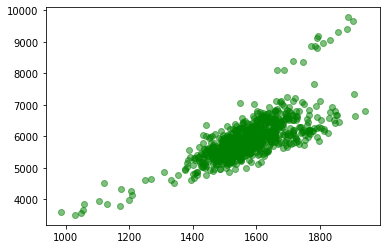

In [49]:
plt.scatter(df['NO_PRODUCTS'],df['TOTAL_SALES'],color = 'green',alpha=0.5) #alpha คือ สีความจางของข้อมูลว่าต้องการสีเข้ม/จางแค่ไหน

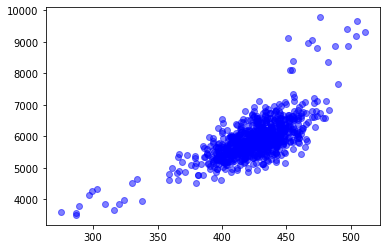

In [50]:
plt.scatter(df['NO_CUSTOMERS'],df['TOTAL_SALES'],color='blue',alpha=0.5)

In [0]:
x = df[['NO_PRODUCTS','NO_CUSTOMERS']] #x1=NO_PRODUCTS,x2=NO_CUSTOMERS ยังไม่มีค่า constant เวลาทำสมการเส้นตรงสูตรมันเป็น y=m1x1+m2x2+...+constant จึงต้อง add ค่าconstant ไปด้วย
y = df[['TOTAL_SALES']]

In [52]:
import statsmodels.api as sm
x = sm.add_constant(x) #add ค่า constant ให้ model

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [53]:
x.head()

,const,NO_PRODUCTS,NO_CUSTOMERS
0,1.0,1468,393
1,1.0,1446,401
2,1.0,1550,421
3,1.0,1403,396
4,1.0,1333,359


In [54]:
y.head()

,TOTAL_SALES
0,5797.93
1,5613.77
2,5843.63
3,5303.99
4,4618.97


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0) #test_size คือ จะแบ่ง train กี่% testกี่% 0.2=train80%, test20%, random_state ใส่เลขอะไรก็ได้ ใส่ 0 

In [57]:
for temp in [X_train,X_test,y_train,y_test] :
  print(temp.shape) #ดูว่าข้อมูลของเราแบ่งตามที่ตั้ง test_size เอาไว้หรือไม่ (655, 2) คือ X_train 80%=655 ตัว ตัวแปร x ของข้อมูลชุดนี้เรากำหนดเอาไว้ 3 ตัวแปร คือ constant, NO.PRODUCTS, NO.CUSTOMERS

(655, 3)
(164, 3)
(655, 1)
(164, 1)


In [58]:
X_train.head()

,const,NO_PRODUCTS,NO_CUSTOMERS
37,1.0,1576,440
372,1.0,1696,471
48,1.0,1542,418
627,1.0,1055,316
564,1.0,1528,444


In [0]:
train_ols = sm.OLS(y_train,X_train) #OLS = ordinary linear square คือ linear regression

In [0]:
train_result = train_ols.fit()

In [61]:
train_result.summary() #P ถ้าน้อยกว่า 0.05 แปลว่าตัวแปร x ตัวนั้นมีความสัมพันธ์กับตัวแปร y

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TOTAL_SALES   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     572.1
Date:                Sun, 05 Jan 2020   Prob (F-statistic):          3.39e-144
Time:                        05:01:18   Log-Likelihood:                -4868.9
No. Observations:                 655   AIC:                             9744.
Df Residuals:                     652   BIC:                             9757.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2848.4611    265.215    -10.740      0.000   -3369.239   -2327.683
NO_PRODUCTS      2.9900      0.195     15.350      0.000       2.608       3.373
NO_CUSTOMERS     9.4990      0.828     11.479      0.000       7.874      11.124
==============================================================================
Omnibus:                      268.916   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1478.825
Skew:                           1.765   Prob(JB):                         0.00
Kurtosis:                       9.459   Cond. No.                     2.71e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
train_result.params

const          -2848.461050
NO_PRODUCTS        2.990040
NO_CUSTOMERS       9.499021
dtype: float64

In [63]:
train_result.predict([1,1000,400]) # 1 =ค่า constant, 1000=NO_PRODUCTS, 400=NO_CUSTOMERS คำตอบที่ได้ คือ y(TOTAL_SALES)

array([3941.18707826])

In [0]:
#ลองนำข้อมูลที่เป็น category (SHOP_WEEKDAY) เข้าไปใน model ดูบ้าง โดยต้อง transform ข้อมูลไปอยู่ในรูปของ dummy ก่อน
df_dummy = pd.get_dummies(df['SHOP_WEEKDAY'], prefix='DAY', drop_first=True) #prefix คือ ใส่ชื่อหน้า column เฉยๆ ถ้าไม่ใส่ก็จะมีแค่ตัวเลข

In [65]:
#DAY_1 จะไม่มีเพราะไม่จำเป็น ทุกครั้งที่ create dummy column จะมีจำนวนcolumn ทั้งหมด n-1 เสมอ DAY_1 คือ baseline
df_dummy

,DAY_2,DAY_3,DAY_4,DAY_5,DAY_6,DAY_7
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
814,0,0,1,0,0,0
815,0,0,0,1,0,0
816,0,0,0,0,1,0
817,0,0,0,0,0,1


In [66]:
x=pd.concat([x,df_dummy],axis=1) #concat คือการเชื่อมกัน โดยที่ axis=1 คือเอา row มาชนกัน
x.head()

,const,NO_PRODUCTS,NO_CUSTOMERS,DAY_2,DAY_3,DAY_4,DAY_5,DAY_6,DAY_7
0,1.0,1468,393,1,0,0,0,0,0
1,1.0,1446,401,0,1,0,0,0,0
2,1.0,1550,421,0,0,1,0,0,0
3,1.0,1403,396,0,0,0,1,0,0
4,1.0,1333,359,0,0,0,0,1,0


In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)
for temp in [X_train,X_test,y_train,y_test] :
  print(temp.shape)

(655, 9)
(164, 9)
(655, 1)
(164, 1)


In [68]:
train_ols_dummy = sm.OLS(y_train, X_train)
train_result =train_ols_dummy.fit()
train_result.summary() # ค่า ส.ป.ส.ของ DAY_1 คือ อาค่า coef ของ const+DAY_2+DAY_3+DAY_4+DAY_5+DAY_6+DAY_7
#จะเห็นว่า P value ของ DAY_2...DAY_7 มากกว่า 0.05 จึงตัดทิ้งได้ไม่มีความสัมพันธ์กับ ตัวแปร y

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TOTAL_SALES   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     142.0
Date:                Sun, 05 Jan 2020   Prob (F-statistic):          7.17e-137
Time:                        05:03:09   Log-Likelihood:                -4868.5
No. Observations:                 655   AIC:                             9755.
Df Residuals:                     646   BIC:                             9795.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2834.0065    269.783    -10.505      0.000   -3363.763   -2304.250
NO_PRODUCTS      2.9830      0.196     15.214      0.000       2.598       3.368
NO_CUSTOMERS     9.5144      0.832     11.437      0.000       7.881      11.148
DAY_2           15.1396     58.716      0.258      0.797    -100.159     130.438
DAY_3           -6.4468     59.848     -0.108      0.914    -123.967     111.073
DAY_4          -11.9753     58.705     -0.204      0.838    -127.252     103.301
DAY_5          -16.0753     60.186     -0.267      0.789    -134.259     102.108
DAY_6          -32.1954     59.488     -0.541      0.589    -149.008      84.617
DAY_7          -20.3383     60.610     -0.336      0.737    -139.354      98.677
==============================================================================
Omnibus:                      270.569   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1503.834
Skew:                           1.774   Prob(JB):                         0.00
Kurtosis:                       9.521   Cond. No.                     2.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
train_result.predict([1,1000,400,0,0,0,0,0,0]) #อันนี้คือ predict ของ DAY_1 เพราะ ค่าของ DAY_2 ถึง DAY_7 เป็น 0 ทั้งหมด

array([3954.74125732])

In [0]:
#เอา model นี้ไปลอง test กับ data ที่มันไม่เคยเห็นดูว่า result เป็นยังไง ซึ่งก็คือ data ที่เราแบ่งไว้ 20% ตอนแรก
import numpy as np
from sklearn import metrics

In [0]:
y_pred_train = train_result.predict(X_train)
y_pred_test = train_result.predict(X_test)

In [72]:
np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)) #ค่า error รวมของ model ยิ่งน้อยยิ่งดี เทียบกับ model ของตัวเอง

409.07876052369

In [75]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)) #ค่า error ของ test ควรสูงกว่า train เพราะ train คือ ชุดข้อมูลที่สร้าง model ขึ้นมา แต่ถ้าของ test น้อยกว่าก็ดีแสดงว่า model generalize

414.6262687213732

In [76]:
df.describe() #error ประมาณ 400 คือ ถ้าดู mean TOTAL_SALES ค่าจะอยู่ประมาณ 5500-6300

,SHOP_DATE,SHOP_WEEKDAY,NO_PRODUCTS,NO_CUSTOMERS,TOTAL_SALES
count,8.190000e+02,819.000000,819.000000,819.000000,819.000000
mean,2.006970e+07,4.000000,1575.521368,424.866911,5903.561343
std,7.230399e+03,2.001222,116.379072,26.821799,687.849462
min,2.006041e+07,1.000000,985.000000,275.000000,3506.240000
25%,2.006107e+07,2.000000,1515.000000,412.000000,5512.580000
50%,2.007052e+07,4.000000,1571.000000,427.000000,5845.920000
75%,2.007121e+07,6.000000,1639.500000,441.000000,6202.055000
max,2.008071e+07,7.000000,1942.000000,511.000000,9780.130000


In [78]:
train_result.params #ถ้าคนที่มาเฉพาะวันที่ 2 จะทำให้ y เพิ่มประมาณ 15 

const          -2834.006533
NO_PRODUCTS        2.983004
NO_CUSTOMERS       9.514360
DAY_2             15.139585
DAY_3             -6.446810
DAY_4            -11.975297
DAY_5            -16.075343
DAY_6            -32.195397
DAY_7            -20.338283
dtype: float64